In [8]:
# Logistinė regresija apie būtų pardavimą
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)

# Nekilnojamojo turto savybės
property_size = np.random.normal(100, 20, 200)  # Plotas kvadratiniais metrais
property_price = np.random.normal(300000, 50000, 200)  # Kaina eurais

# Pardavimo sprendimas (1 - parduotas per 3 mėnesius, 0 - neparduotas)
# Tikimybė priklauso nuo dydžio ir kainos
sale_chance = 0.5 + (property_size - 100)/40 - (property_price - 300000)/100000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pakeista pardavimo tikimybės skaičiavimo formulė
sale_chance = sigmoid((property_size - 100)/10 + (property_price - 300000)/50000)

# Sukuriamas 'sold' stulpelis
sold = np.random.binomial(1, sale_chance)



# Sukuriamas DataFrame
real_estate_data = pd.DataFrame({
    'Plotas': property_size.astype(int),
    'Kaina': property_price.round(2),
    'Parduota': sold
})




In [14]:
real_estate_data.to_csv('data/houses.csv')
df_real_estate=pd.read_csv('data/houses.csv')
df_real_estate.isnull().sum()

Unnamed: 0    0
Plotas        0
Kaina         0
Parduota      0
dtype: int64

In [31]:
df_real_estate.head()

,Unnamed: 0,Plotas,Kaina,Parduota
0,0,135,281540.91,1
1,1,108,288031.04,1
2,2,119,354982.98,1
3,3,144,332763.19,1
4,4,137,332006.58,1


In [24]:
# Duomenų padalinimas į mokymo ir testavimo rinkinius
X = df_real_estate[['Plotas', 'Kaina']]
y = df_real_estate['Parduota']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_test

,Plotas,Kaina
18,106,412965.45
170,118,314022.09
107,85,232664.12
98,102,280027.55
177,86,221468.83
182,87,187221.79
5,80,219152.20
146,81,281765.32
12,115,339316.40
152,85,368226.59


In [25]:
from sklearn.linear_model import LogisticRegression

# Sukuriamas logistinės regresijos modelis
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Spėjimai ir modelio tikslumo įvertinimas
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Modelio tikslumas: {accuracy:.2f}')


Modelio tikslumas: 0.50


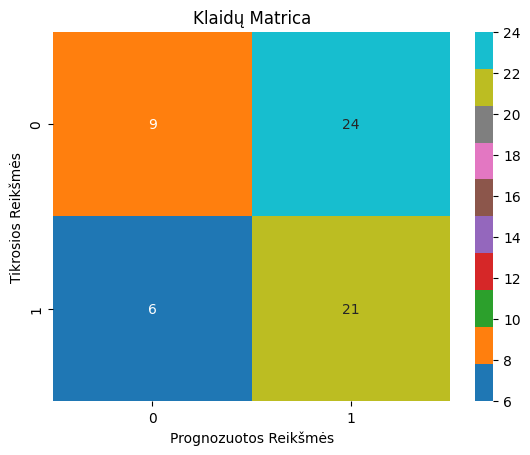

In [27]:
# Klaidų matricos sukūrimas
conf_matrix = confusion_matrix(y_test, predictions)

# Grafiškai pavaizduojama klaidų matrica
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='tab10')
plt.xlabel('Prognozuotos Reikšmės')
plt.ylabel('Tikrosios Reikšmės')
plt.title('Klaidų Matrica')
plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Modelio tikslumas: {accuracy:.2f}')
print(f'Modelio precizija: {precision:.2f}')
print(f'Modelio atitikimas: {recall:.2f}')
print(f'Modelio F1 įvertis: {f1:.2f}')


Modelio tikslumas: 0.50
Modelio precizija: 0.47
Modelio atitikimas: 0.78
Modelio F1 įvertis: 0.58
